In [1]:
import typing
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

In [2]:
def read_data(f) -> typing.Tuple[np.array, str, str]:
    method = f.readline()  # method
    head = f.readline()  # head
    # line: size, exec time mean, exec time std
    data = np.vstack([list(map(float, line.split())) for line in f.readlines()])
    return data, method, head

with open("bench_res\\fast_precision.txt") as fast_precision:
    fast_precision_data = read_data(fast_precision)[0]
with open("bench_res\\kde_precision.txt") as kde_precision:
    kde_precision_data = read_data(kde_precision)[0]
with open("bench_res\\naive_precision.txt") as naive_precision:
    naive_precision_data = read_data(naive_precision)[0]

slope = 0.058	offset = 7.745
slope = 15.275	offset = -777.142
slope = 0.035	offset = 110.693


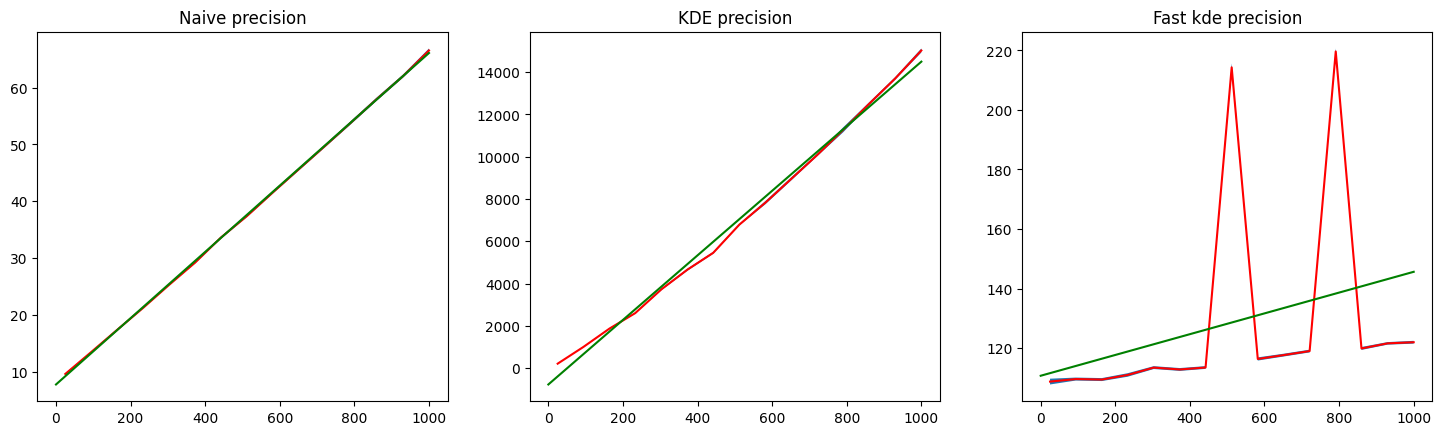

In [3]:
fig, axes = plt.subplots(1, 3)
fig.set_figwidth(6*3)

axes[0].set_title('Naive precision')
axes[1].set_title('KDE precision')
axes[2].set_title('Fast kde precision')

for i, precision_data in enumerate((naive_precision_data, kde_precision_data, fast_precision_data)):
    axes[i].plot(precision_data[:, 0], precision_data[:, 1], color='r')
    axes[i].fill_between(precision_data[:, 0], precision_data[:, 1]-precision_data[:, 2], precision_data[:, 1]+precision_data[:, 2])
    model = LinearRegression(fit_intercept=True).fit(precision_data[:, 0].reshape(-1, 1), precision_data[:, 1])
    axes[i].plot([0, 1_000], model.predict(np.array([0, 1_000]).reshape(-1, 1)), color='g')
    print(f"slope = {model.coef_[0]:.3f}\toffset = {model.intercept_:.3f}")